In [75]:
import pandas as pd
from sqlalchemy import create_engine
# from Config2 import user,password
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
pd.options.display.max_rows=200

### corona_df is the daily case count data by country

In [76]:
# corona_df=pd.read_csv("C:\\Users\\samantha.ettinger\\Desktop\\ML\\WHO-COVID-19-global-data (1).csv")
corona_df=pd.read_csv('WHO-COVID-19-global-data (1).csv')
corona_df=corona_df.rename(columns={"Date_reported":"date"})
corona_df['date']=corona_df['date'].str.split('T').str[0]
reformatted_d=pd.to_datetime(corona_df['date'])
corona_df['date']=reformatted_d
corona_df.dtypes

date                 datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

### joined_df adds 'days_since_first' and 'First_Date' columns

In [77]:
country_list=corona_df['Country'].unique()
country_first_case_dates={}
for each_country in country_list: 
    first_date=corona_df[corona_df['Country']==each_country]['date'].min()
    country_first_case_dates[each_country]=first_date
df=pd.DataFrame(country_first_case_dates.items(), columns=['Country', 'First_Date'])
joined_df=corona_df.join(df.set_index('Country'), on='Country')
joined_df['days_since_first']=joined_df['date']-joined_df['First_Date']

In [78]:
regions=joined_df['WHO_region'].unique()

In [79]:
joined_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire', 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Es

In [80]:
joined_df


,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,First_Date,days_since_first
0,2020-02-24,AF,Afghanistan,EMRO,1,1,0,0,2020-02-24,0 days
1,2020-02-25,AF,Afghanistan,EMRO,0,1,0,0,2020-02-24,1 days
2,2020-02-26,AF,Afghanistan,EMRO,0,1,0,0,2020-02-24,2 days
3,2020-02-27,AF,Afghanistan,EMRO,0,1,0,0,2020-02-24,3 days
4,2020-02-28,AF,Afghanistan,EMRO,0,1,0,0,2020-02-24,4 days
...,...,...,...,...,...,...,...,...,...,...
17838,2020-05-23,ZW,Zimbabwe,AFRO,0,51,0,4,2020-03-20,64 days
17839,2020-05-24,ZW,Zimbabwe,AFRO,5,56,0,4,2020-03-20,65 days
17840,2020-05-25,ZW,Zimbabwe,AFRO,0,56,0,4,2020-03-20,66 days
17841,2020-05-26,ZW,Zimbabwe,AFRO,0,56,0,4,2020-03-20,67 days


In [81]:
# for each_country in joined_df['Country'].unique():
#     italy=joined_df[joined_df['Country']==each_country].sort_values('days_since_first')
#     x=np.arange(0, len(italy))
#     p=np.polyfit(range(0, len(italy)), italy['Cumulative_cases'],3)
#     print(p)
#     # italy['Cumulative_cases'].plot(label='cases')
#     plt.title(each_country)
#     plt.plot(x, italy['Cumulative_cases'], label='cases')
#     y=np.polyval(p, x)
#     plt.plot(x, y, label='line')
#     plt.show()

In [82]:
italy

,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,First_Date,days_since_first
17774,2020-03-20,ZW,Zimbabwe,AFRO,1,1,0,0,2020-03-20,0 days
17775,2020-03-21,ZW,Zimbabwe,AFRO,1,2,0,0,2020-03-20,1 days
17776,2020-03-22,ZW,Zimbabwe,AFRO,0,2,0,0,2020-03-20,2 days
17777,2020-03-23,ZW,Zimbabwe,AFRO,0,2,0,0,2020-03-20,3 days
17778,2020-03-24,ZW,Zimbabwe,AFRO,0,2,1,1,2020-03-20,4 days
17779,2020-03-25,ZW,Zimbabwe,AFRO,0,2,0,1,2020-03-20,5 days
17780,2020-03-26,ZW,Zimbabwe,AFRO,0,2,0,1,2020-03-20,6 days
17781,2020-03-27,ZW,Zimbabwe,AFRO,3,5,0,1,2020-03-20,7 days
17782,2020-03-28,ZW,Zimbabwe,AFRO,0,5,0,1,2020-03-20,8 days
17783,2020-03-29,ZW,Zimbabwe,AFRO,0,5,0,1,2020-03-20,9 days


In [83]:
joined_df[(joined_df['days_since_first']=='110 days') & (joined_df['WHO_region']=='EURO')]

,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,First_Date,days_since_first
1631,2020-05-24,BE,Belgium,EURO,299,56810,25,9237,2020-02-04,110 days
5602,2020-05-18,FI,Finland,EURO,61,6347,1,298,2020-01-29,110 days
5722,2020-05-13,FR,France,EURO,670,138161,348,26948,2020-01-24,110 days
6244,2020-05-17,DE,Germany,EURO,583,174355,33,7914,2020-01-28,110 days
8443,2020-05-18,IT,Italy,EURO,675,225435,145,31908,2020-01-29,110 days
13730,2020-05-20,RU,Russian Federation,EURO,8764,308705,135,2972,2020-01-31,110 days
15463,2020-05-20,ES,Spain,EURO,431,232037,69,27778,2020-01-31,110 days
15852,2020-05-20,SE,Sweden,EURO,422,30799,45,3743,2020-01-31,110 days
16292,2020-05-20,GB,The United Kingdom,EURO,2412,248822,545,35341,2020-01-31,110 days


In [84]:
joined_df[joined_df['WHO_region']=='AMRO']['Country'].unique()

array(['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas',
       'Barbados', 'Belize', 'Bermuda',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Brazil',
       'British Virgin Islands', 'Canada', 'Cayman Islands', 'Chile',
       'Colombia', 'Costa Rica', 'Cuba', 'Curacao', 'Dominica',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Falkland Islands (Malvinas) [2]', 'French Guiana', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Martinique', 'Mexico', 'Montserrat', 'Nicaragua',
       'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Saint Barthélemy',
       'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Sint Maarten', 'Suriname', 'Trinidad and Tobago',
       'Turks and Caicos Islands', 'United States of America',
       'United States Virgin Islands', 'Uruguay',
       'Venezuela 

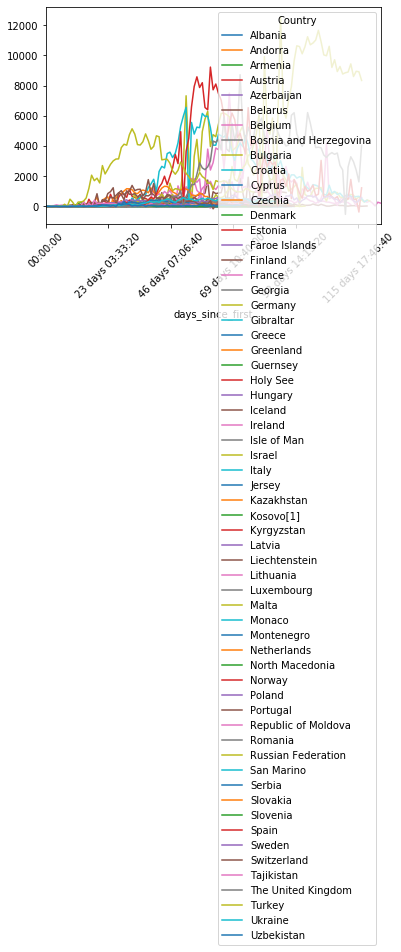

In [85]:
# joined_df[joined_df['WHO_region']=='EURO'][['Country', 'Cumulative_cases', 'days_since_first']].set_index('Country').plot(x='days_since_first', y='Cumulative_cases')
joined_df[joined_df['WHO_region']=='EURO'][['Country', 'New_cases', 'days_since_first']].pivot(index='days_since_first', columns='Country', values='New_cases').plot(legend=True, rot=45)

In [86]:
%%html
<img src='image_1.gif', width=200, height=200>

### mobility_df is the mobility data by country

In [87]:
mobility_df=pd.read_csv("cleaneddata.csv")
mobility_df=mobility_df.rename(columns={"region":"Country"})
reformatted_date=pd.to_datetime(mobility_df['date'])
mobility_df['date']=reformatted_date
mobility_df.drop(['geo_type'], axis=1, inplace=True)
driving=mobility_df[mobility_df['transportation_type']=='driving'].drop(['transportation_type'], axis=1).rename(columns={'score': 'driving_score'})
walking=mobility_df[mobility_df['transportation_type']=='walking'].drop(['transportation_type'], axis=1).rename(columns={'score': 'walking_score'})
transit=mobility_df[mobility_df['transportation_type']=='transit'].drop(['transportation_type'], axis=1).rename(columns={'score': 'transit_score'})
combined_df=driving.merge(walking, on=['Country', 'date'], how='outer').merge(transit, on=['Country', 'date'], how='outer')
# transposed_df.dtypes
combined_df

,Country,driving_score,date,walking_score,transit_score
0,Albania,100.00,2020-01-13,100.00,NaN
1,Argentina,100.00,2020-01-13,100.00,NaN
2,Australia,100.00,2020-01-13,100.00,100.00
3,Austria,100.00,2020-01-13,100.00,NaN
4,Belgium,100.00,2020-01-13,100.00,100.00
...,...,...,...,...,...
15195,Utrecht,53.17,2020-04-21,66.89,30.41
15196,Vancouver,54.07,2020-04-21,50.87,19.23
15197,Vienna,61.82,2020-04-21,39.56,NaN
15198,Washington DC,52.28,2020-04-21,38.40,17.76


In [88]:
def get_stats(country_name, score_type):
    single_df=combined_df[combined_df['Country']==country_name].sort_values('date').reset_index(drop='True')
    y=pd.DataFrame()
    y[['date', 'driving_score']]=single_df[['date', score_type]]
    y['diff']=y['driving_score'].diff()
    y['decrease']=y['diff']<0
    country_data={
        'max_drop': 0
    }
    consecutive_drop=0
    num_days=0
    last_index=0
    country_data['country']=country_name
    num_increases=0
    for index, each_row in y.iterrows():
        num_increases+=each_row['diff']>0
#         print(f"value: {each_row['diff']}")
#         print(f'increases: {num_increases}')
        if each_row['diff']<=0:
            consecutive_drop+=each_row['diff']
#             print('add')
            num_days+=1
            if consecutive_drop<=country_data['max_drop']:
                country_data['last_index']=index
                country_data['max_drop']=consecutive_drop
                country_data['date']=each_row['date']
                country_data['num_drops']=num_days
                country_data['start_date'], country_data['start_score']=y.loc[country_data['last_index']-country_data['num_drops']][['date', 'driving_score']]
            num_increases=0
        else: 
            consecutive_drop=0
            num_days=0
    return country_data
get_stats('United States', 'driving_score')

{'max_drop': -43.13000000000001,
 'country': 'United States',
 'last_index': 34,
 'date': Timestamp('2020-02-16 00:00:00'),
 'num_drops': 2,
 'start_date': Timestamp('2020-02-14 00:00:00'),
 'start_score': 145.4}

## NEED TO FIND A MAPPING FOR CITIES TO COUNTRIES

In [34]:
mobility_df['geo_type'].value_counts().plot(kind='bar')

KeyError: 'geo_type'

In [89]:
combined_df[combined_df['Country']=='United States']['driving_score'].diff()

58         NaN
210       2.97
362       2.22
514       3.29
666      17.03
818     -10.47
970     -24.13
1122     11.66
1274      0.50
1426     -0.06
1578      4.89
1730     16.80
1882     -3.78
2034    -33.60
2186     10.65
2338      3.57
2490      0.66
2642      5.41
2794     18.47
2946     -3.76
3098    -37.07
3250     13.61
3402      3.13
3554     -0.22
3706      5.95
3858     16.35
4010     -1.20
4162    -31.29
4314     11.35
4466      3.82
4618      2.27
4770      9.34
4922     27.04
5074    -12.89
5226    -30.24
5378      8.51
5530     -1.32
5682      1.39
5834      4.01
5986     20.99
6138     -1.50
6290    -34.87
6442      6.75
6594      4.04
6746      2.09
6898      6.49
7050     20.95
7202     -1.39
7354    -37.37
7506      6.69
7658      5.25
7810      0.07
7962      6.69
8114     20.24
8266     -2.61
8418    -35.73
8570      8.01
8722      1.69
8874     -0.37
9026     -2.48
9178      8.52
9330    -14.14
9482    -26.71
9634      7.93
9786     -7.05
9938     -4.20
10090    -

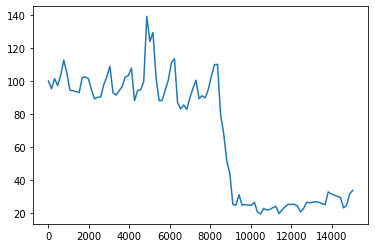

In [90]:
combined_df[combined_df['Country']=='Albania']['driving_score'].plot()

In [91]:
country_data_list_driving=[]
country_data_list_walking=[]
country_data_list_transit=[]
for each_country in combined_df['Country'].unique():
    country_data_list_driving.append(get_stats(each_country, 'driving_score'))
    country_data_list_transit.append(get_stats(each_country, 'transit_score'))
    country_data_list_walking.append(get_stats(each_country, 'walking_score'))
score_summary_df=pd.DataFrame(country_data_list_driving)
score_summary_df

,max_drop,country,last_index,date,num_drops,start_date,start_score
0,-85.46,Albania,61,2020-03-14,6,2020-03-08,110.07
1,-51.05,Argentina,62,2020-03-15,2,2020-03-13,98.75
2,-30.47,Australia,13,2020-01-26,3,2020-01-23,115.65
3,-49.95,Austria,64,2020-03-17,4,2020-03-13,86.98
4,-49.11,Belgium,62,2020-03-15,4,2020-03-11,105.97
5,-79.10,Brazil,69,2020-03-22,8,2020-03-14,106.68
6,-74.34,Bulgaria,66,2020-03-19,12,2020-03-07,113.53
7,-24.53,Cambodia,45,2020-02-27,6,2020-02-21,98.62
8,-45.41,Canada,35,2020-02-17,3,2020-02-14,140.55
9,-50.98,Chile,62,2020-03-15,2,2020-03-13,109.18


In [92]:
albania=combined_df[combined_df['Country']=='Albania'].sort_values('date').reset_index(drop='True')
albania['change']=np.where(albania.driving_score.diff()>0, 'increase', 'decrease')
parzen=albania.loc[:, 'driving_score'].rolling(3, min_periods=1, win_type='parzen').sum()
parzen_max=parzen.max()
# albania.loc[:,'drop']=albania[parzen>parzen_max*.7]

albania['drop']=parzen>(parzen_max*.7)
albania[albania['drop']]

,Country,driving_score,date,walking_score,transit_score,change,drop
2,Albania,101.43,2020-01-15,98.93,NaN,increase,True
3,Albania,97.20,2020-01-16,98.46,NaN,decrease,True
4,Albania,103.55,2020-01-17,100.85,NaN,increase,True
5,Albania,112.67,2020-01-18,100.13,NaN,increase,True
6,Albania,104.83,2020-01-19,82.13,NaN,decrease,True
7,Albania,94.39,2020-01-20,95.65,NaN,decrease,True
8,Albania,94.07,2020-01-21,97.78,NaN,decrease,True
12,Albania,102.38,2020-01-25,97.06,NaN,increase,True
13,Albania,101.41,2020-01-26,77.27,NaN,decrease,True
14,Albania,94.62,2020-01-27,83.37,NaN,decrease,True


In [93]:
r=albania.loc[:, 'driving_score'].rolling(3, min_periods=1, win_type='parzen').sum()
albania[['date', 'SMA_3', 'driving_score']].plot(x='date', y=['SMA_3', 'driving_score'])

KeyError: "['SMA_3'] not in index"

In [ ]:
r = albania['SMA_3']=albania.loc[:, 'driving_score'].rolling(3, min_periods=1, win_type='parzen').sum()
n = r.max()
albania[r>n*.4]

In [ ]:
albania=combined_df[combined_df['Country']=='Republic of Korea'].reset_index(drop='True')
albania
for i in range(0, albania.shape[0]-2):
#     albania.loc[albania.index[i+2], 'SMA_3']=np.round(((albania.loc[i,'driving_score']+ albania.loc[i+1,'driving_score'] +albania.loc[i+2, 'driving_score'])/3),1)
    albania['SMA_3']=albania.loc[:, 'driving_score'].rolling(window=7).mean()
albania[['date', 'SMA_3', 'driving_score']].plot(x='date', y=['SMA_3', 'driving_score'])

In [ ]:
countries=combined_df['Country'].unique()
countries

In [ ]:
combined_df['transit_score'].describe()
print(combined_df)

In [ ]:
target_country='Russia'
fig, (ax_1, ax_2)=plt.subplots(1, 2)
# combined_df[combined_df['Country']==target_country].plot(x='date', y=['driving_score', 'walking_score', 'transit_score'], ax=ax_1)
# joined_df[joined_df['Country']==target_country].plot(x='date', y='Cumulative_cases', ax=ax_2)
# combined_df[(combined_df['Country']=='Russia') | (combined_df['Country']=='Brazil')].plot(x='date', y='walking_score', ax=ax_1)
combined_df[(combined_df['Country']=='United States') | (combined_df['Country']=='Saint Petersburg')].pivot(index='date', columns='Country', values='driving_score').plot(ax=ax_1)
joined_df[(joined_df['Country']=='United States of America') | (joined_df['Country']=='Russian Federation')].pivot(index='days_since_first', columns='Country', values='Cumulative_cases').plot(ax=ax_2)

In [ ]:
combined_df

In [132]:
final_df=joined_df.merge(combined_df)
print(len(final_df['Country'].unique()))
final_df['growth_rate']=final_df['New_cases']/(final_df['Cumulative_cases']-final_df['New_cases'])
data=final_df[['WHO_region', 'days_since_first', 'driving_score', 'walking_score', 'transit_score', 'growth_rate']]
data['days_since_first']=data['days_since_first'].map(lambda x: int(str(x).split(' ')[0]))
data=pd.get_dummies(data)
data.drop(data[data['days_since_first']==0].index, inplace=True)
data
final_df

23


C:\Users\samantha.ettinger\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,First_Date,days_since_first,driving_score,walking_score,transit_score,growth_rate
0,2020-01-25,AU,Australia,WPRO,3,3,0,0,2020-01-25,0 days,88.59,103.02,90.61,inf
1,2020-01-26,AU,Australia,WPRO,1,4,0,0,2020-01-25,1 days,85.18,87.40,81.83,0.333333
2,2020-01-27,AU,Australia,WPRO,1,5,0,0,2020-01-25,2 days,95.91,96.18,101.78,0.250000
3,2020-01-28,AU,Australia,WPRO,0,5,0,0,2020-01-25,3 days,99.40,100.57,104.81,0.000000
4,2020-01-29,AU,Australia,WPRO,2,7,0,0,2020-01-25,4 days,99.92,100.25,103.03,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2020-04-17,CH,Switzerland,EURO,315,26651,43,1016,2020-02-25,52 days,72.89,72.89,35.43,0.011961
1620,2020-04-18,CH,Switzerland,EURO,346,26997,42,1058,2020-02-25,53 days,67.98,71.94,33.75,0.012983
1621,2020-04-19,CH,Switzerland,EURO,325,27322,52,1110,2020-02-25,54 days,66.18,67.65,35.20,0.012038
1622,2020-04-20,CH,Switzerland,EURO,336,27658,24,1134,2020-02-25,55 days,68.48,61.70,34.66,0.012298


In [ ]:
final_df['Country'].unique()

In [ ]:
for each_country in final_df['Country'].unique():
    ax=final_df[final_df['Country']==each_country][['Cumulative_cases']].plot()
    final_df[final_df['Country']==each_country][['walking_score']].plot(secondary_y=True, ax=ax)

In [130]:
combined_df=combined_df.dropna()
combined_df

,Country,driving_score,date,walking_score,transit_score
2,Australia,100.00,2020-01-13,100.00,100.00
4,Belgium,100.00,2020-01-13,100.00,100.00
5,Brazil,100.00,2020-01-13,100.00,100.00
8,Canada,100.00,2020-01-13,100.00,100.00
12,Czech Republic,100.00,2020-01-13,100.00,100.00
...,...,...,...,...,...
15194,Toulouse,29.79,2020-04-21,18.41,36.96
15195,Utrecht,53.17,2020-04-21,66.89,30.41
15196,Vancouver,54.07,2020-04-21,50.87,19.23
15198,Washington DC,52.28,2020-04-21,38.40,17.76


In [ ]:
final_df=joined_df.merge(combined_df)

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

# print(len(data))
# data.dropna(inplace=True)
# print(len(data))
X=data.drop(['growth_rate', 'driving_score'], axis=1)
y=data['growth_rate']
X_train, X_test, y_train, y_test=train_test_split(X, y)
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
test_df=pd.DataFrame(X_test)
test_df['growth_rate']=y_test
test_df['prediction']=lr.predict(X_test.drop('growth_rate', axis=1))
# test_df
# lr.predict(X_test)
test_df
# plt.scatter(X_train, y_train,  color='black')

,days_since_first,walking_score,transit_score,WHO_region_AMRO,WHO_region_EURO,WHO_region_WPRO,growth_rate,prediction
290,68,48.68,18.88,1,0,0,0.123154,0.087193
822,9,108.94,105.97,0,0,1,0.000000,0.227715
904,91,72.88,64.82,0,0,1,0.053756,0.024119
255,33,135.19,105.38,1,0,0,0.272727,0.249288
1429,26,123.93,131.87,0,1,0,5.000000,0.309335
...,...,...,...,...,...,...,...,...
1555,70,70.35,55.36,0,1,0,0.085758,0.133309
1592,25,41.14,22.24,0,1,0,0.255579,0.181418
1580,13,90.24,90.40,0,1,0,0.000000,0.285846
1616,49,59.93,32.24,0,1,0,0.011063,0.143643


In [134]:
X_train=X_train['transit_score']

In [135]:
y_train.reset_index(drop=True,inplace=True)

In [136]:
y_train.max()

10.272727272727273

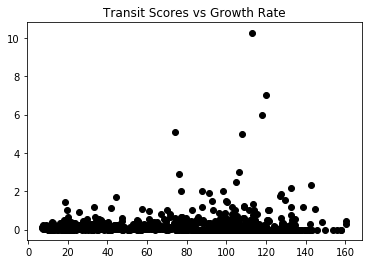

In [138]:
plt.scatter(X_train, y_train,  color='black')
plt.title('Transit Scores vs Growth Rate')

plt.savefig('C:\\Users\\samantha.ettinger\\Transit_Scores_Growth_Rate.png',dpi=100)

In [ ]:
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
# y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

In [139]:
lr.score(X_test.drop('growth_rate', axis=1), y_test)

0.07670910882175874

In [ ]:
merge_table=pd.merge(corona_df,mobility_df,on=["Country","date"])
merge_table

In [ ]:
final_score=merge_table["score"]
final_score

In [94]:
merge_table.loc[merge_table['score']<50,'outcome']=1
merge_table.loc[merge_table['score']>=50,'outcome']=0
merge_table

C:\Users\samantha.ettinger\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,transportation_type,score,outcome
3,2020-03-10,AL,Albania,EURO,4,6,0,0,walking,63.37,0.0
4,2020-03-11,AL,Albania,EURO,4,10,0,0,driving,51.77,0.0
15,2020-03-16,AL,Albania,EURO,9,51,0,1,walking,35.95,1.0
30,2020-03-24,AL,Albania,EURO,34,123,2,4,driving,21.61,1.0
40,2020-03-29,AL,Albania,EURO,15,212,1,10,driving,21.78,1.0


In [95]:
merge_table=merge_table.iloc[[3,4,15,30,40]]
merge_table

IndexError: positional indexers are out-of-bounds

In [96]:
outcome=merge_table['outcome']
outcome

3     0.0
4     0.0
15    1.0
30    1.0
40    1.0
Name: outcome, dtype: float64

In [97]:
dat=merge_table["Cumulative_cases"]
dat=dat.to_numpy()
d=dat.reshape(-1,1)
d

array([[  6],
       [ 10],
       [ 51],
       [123],
       [212]], dtype=int64)

In [98]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(d)
encoded=encoded.reshape(-1,1)
encoded.astype('int')
encoded

C:\Users\samantha.ettinger\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0],
       [1],
       [2],
       [3],
       [4]], dtype=int64)

In [99]:
print(utils.multiclass.type_of_target(d.astype('int')))

multiclass


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded, outcome, random_state=42)

In [101]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:
predictions = model.predict(X_test)

In [103]:
target_names = ["negative", "positive"]

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\samantha.ettinger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


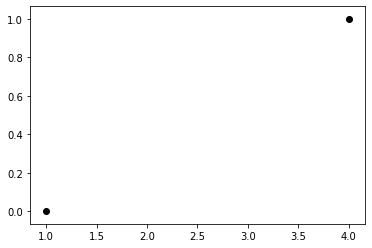

In [105]:

plt.scatter(X_test, y_test,  color='black')